<p><img alt="Colaboratory logo" width="80px" height="80px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1><center> <strong>Trabajo Final De Practicas</strong></h1>
<p><center><em>Cristiam Loaiza &nbsp; cristiam.loaiza@udea.edu.co</p>

<h4>Librerias</h4>

1. Definir las librerias a utilizar en el modelo.

Las librerias de escogencia son: <br>
* Pandas : Manejo de grandes datos en dataframes<br>
* Numpy : Manipulacion de Arrays<br>
* Seaborn : Graficas mas estilizadas<br>
* csv : Manipulacion de archivos separados por comas<br>
* Matplotlib : visulizacion de graficas<br>
* Tqdm : Visualizacion de procesos, cuantifiacion de iteraciones por segundo <br>
* Kmeans : <br>
* StandardScaler:
* PCA : <br>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from io import StringIO
import csv
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
from tqdm import tqdm

In [4]:
from scipy.sparse import csr_matrix
from scipy.sparse import save_npz

In [5]:
from sklearn.neighbors import NearestNeighbors

In [6]:
import json

<p>Diccionario de datos para la manipulacion de titulos y legendas en las graficas</p>

In [7]:
font = {
  'family':'serif',
  'color': 'Green',
  'weight':'normal',
  'size':40
}
font_title = {
  'family':'serif',
  'color':  'black',
  'weight':'normal',
  'size':30
}

fontLabel = {
  'family':'serif',
  'color': 'black',
  'weight':'normal',
  'size':20
}

<h4>Rutas de Acceso al Dataset</h4>

2. Rutas de Accesos a los datos en para el modelo.

In [8]:
route_movies = "Datasets/ml-1m/movies.dat"
route_ratings = "Datasets/ml-1m/ratings.dat"
route_users = "Datasets/ml-1m/users.dat"

<h4>Acceso a los Datos</h4>

3. En el acceso a los datos se encuentran 3 tablas relacionales de datos estructurados
*OBJETIVO DE VALOR*
* Se propone la unión de tablas para obtener una relación total de datos que permitan ver la calidad y cantidad de los datos.

In [9]:
data_movies= pd.read_csv(route_movies,header=None,sep="::",engine="python",encoding='latin-1')
data_user=pd.read_csv(route_users,sep="::",header=None, engine="python",encoding='latin-1')
data_ratings=pd.read_csv(route_ratings,sep="::",header=None,engine="python",encoding='latin-1')

In [10]:
data_ratings

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [11]:
data_ratings.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [12]:
data_user

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [13]:
data_user.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [14]:
data_movies

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [15]:
data_movies.isnull().sum()

0    0
1    0
2    0
dtype: int64

**CONCLUSIONES PRIMER CHECKEO DE DATOS**
* No se encuentran datos nulos, es un dataset muy limpio. En caso tal de que se hallasen datos nulos se procede a hallar valores que tengan relación con los datos de la columna para poder reemplazar dicho valor nulo. Se pueden utilizar técnicas de aproximaciones o eliminar la columna o fila pertinente (esto varia dependiendo de la importancia del dato)

---

<h2>Exploracion De Datos</h2>


---

<h4>Identificar y Unir Columnas al Dataframe</h4>

In [16]:
data_user_copy= data_user.copy()
data_user_copy.rename(columns={0:"UserID",1:"Gender",2:"Age",3:"Ocupation",4:"Zip_Code"},inplace=True)

In [17]:
data_user_copy.head()

,UserID,Gender,Age,Ocupation,Zip_Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


<h4>Data Ratings</h4>

In [18]:
data_rating_copy=data_ratings.copy()
data_rating_copy.rename(columns={0:"UserID",1:"MovieID",2:"Ratings",3:"Timestamp"},inplace=True)

In [19]:
data_rating_copy.head()

,UserID,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


<h4>Data Movies</h4>

In [20]:
data_movie_copy = data_movies.copy()
data_movie_copy.rename(columns={0:"MovieID",1:"Title",2:"Genres"},inplace=True)

In [21]:
data_movie_copy.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


<h4>Union de Tablas</h4>

<p>Se escoge la tabla Ratings como tabla principal para comenzar a unir las columnas correspondientes</p>


In [22]:
data_rating_copy=data_rating_copy.merge(data_user_copy,on="UserID")
data_rating_copy.head()

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Ocupation,Zip_Code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [23]:
data_rating_copy= data_rating_copy.merge(data_movie_copy,on="MovieID")
data_rating_copy.head(20000)

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Ocupation,Zip_Code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
19995,4422,3105,4,965118729,M,25,5,10463,Awakenings (1990),Drama
19996,4425,3105,4,965108415,M,35,7,98607,Awakenings (1990),Drama
19997,4430,3105,2,965101956,F,25,0,94403,Awakenings (1990),Drama
19998,4452,3105,3,965089072,F,25,7,78666,Awakenings (1990),Drama


In [24]:
data_rating_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1000209 non-null  int64 
 1   MovieID    1000209 non-null  int64 
 2   Ratings    1000209 non-null  int64 
 3   Timestamp  1000209 non-null  int64 
 4   Gender     1000209 non-null  object
 5   Age        1000209 non-null  int64 
 6   Ocupation  1000209 non-null  int64 
 7   Zip_Code   1000209 non-null  object
 8   Title      1000209 non-null  object
 9   Genres     1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [25]:
total_data = data_rating_copy

---

<h2>Transformacion de Datos</h2>

In [26]:
data_to_bin = total_data[["Age","Ratings","Gender","Ocupation","Zip_Code","Genres"]]

In [27]:
data_to_bin.head()

,Age,Ratings,Gender,Ocupation,Zip_Code,Genres
0,1,5,F,10,48067,Drama
1,56,5,M,16,70072,Drama
2,25,4,M,12,32793,Drama
3,25,4,M,7,22903,Drama
4,50,5,M,1,95350,Drama


In [28]:
data_to_bin["Gender"]=data_to_bin["Gender"].map(lambda x: 1 if x=='M' else 0)

C:\Users\crist\AppData\Local\Temp/ipykernel_12336/2604126013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_bin["Gender"]=data_to_bin["Gender"].map(lambda x: 1 if x=='M' else 0)


In [29]:
data_to_bin.head()

,Age,Ratings,Gender,Ocupation,Zip_Code,Genres
0,1,5,0,10,48067,Drama
1,56,5,1,16,70072,Drama
2,25,4,1,12,32793,Drama
3,25,4,1,7,22903,Drama
4,50,5,1,1,95350,Drama


In [30]:
unique_vGenres = []
for i in data_to_bin["Genres"]:
    unique_vGenres.append(i.split("|"))

In [31]:
valuesUniquesGenres = []
for i,value in enumerate(unique_vGenres):
    for j in range(len(unique_vGenres[i])):
        valuesUniquesGenres.append(unique_vGenres[i][j])

In [32]:
df_uniquesGenres=pd.DataFrame(valuesUniquesGenres)

In [33]:
df_unique_vGenres_total = df_uniquesGenres[0].unique()

---


import seaborn as sns
import matplotlib.pyplot as plt
 
tips = sns.load_dataset('tips')
sns.lmplot(x ='total_bill', y ='tip', size = 2, aspect = 4, data = tips)

<h1>Tecnica Filtro Colaborativo</h1>

In [34]:
total_data =  data_rating_copy

In [35]:
total_data.head()

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Ocupation,Zip_Code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [36]:
c_moviesId = total_data["MovieID"].nunique()
c_userId = total_data["UserID"].nunique()
c_ratings= len(total_data["Ratings"])
c_moviesId,c_userId, c_ratings

(3706, 6040, 1000209)

<p>Agrupacion por usuario y cantidad de ratings a las peliculas</p>

In [37]:
userFreq = total_data[["UserID","MovieID"]].groupby("UserID").count().reset_index()
userFreq.columns = ["UserID","nRatings"]
userFreq.head()

,UserID,nRatings
0,1,53
1,2,129
2,3,51
3,4,21
4,5,198


In [38]:
userFreq.tail()

,UserID,nRatings
6035,6036,888
6036,6037,202
6037,6038,20
6038,6039,123
6039,6040,341


<p>Media de Ratings por usuario</p>

In [39]:
userFreq["nRatings"].mean()

165.5975165562914

<h3>Conclusiones</h3>

<ul>
    <li> En el dataset se encuentran 3706 peliculas diferentes</li>
    <li> En el dataset se encuentran 6040 usuarios diferentes</li>
    <li> En en promedio cada usuario del dataset califica 165 peliculas</li>
</ul>

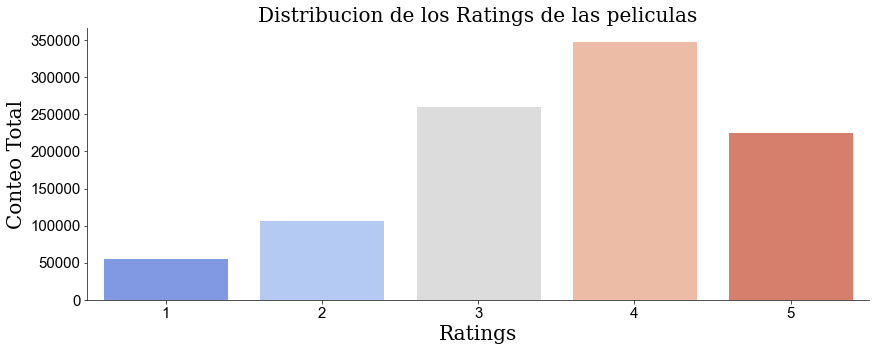

In [78]:
sns.set_style("ticks")
plt.figure(figsize=(14,5))
sns.countplot(x="Ratings",data=total_data,palette="coolwarm")
sns.despine()
plt.title("Distribucion de los Ratings de las peliculas",fontLabel)
plt.xlabel("Ratings",fontLabel)
plt.ylabel("Conteo Total",fontLabel)

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15,color='black')
plt.show()

<h3>Conclusiones</h3>

<ul>
    <li> El Rating/calificacion mas comun es el 4</li>
    <li> El Rating/calificacion menos comun es el 1</li>
</ul>


<h3>Mejor y peor valoracion por pelicula</h3>

In [41]:
meanRating = total_data.groupby("MovieID")[["Ratings"]].mean()
lw_rated = meanRating["Ratings"].idxmin()

In [42]:
meanRating.head()

,Ratings
MovieID,
1,4.146846
2,3.201141
3,3.016736
4,2.729412
5,3.006757


In [43]:
lw_rated

127

In [44]:
meanRating["Ratings"].min()


1.0

In [45]:
total_data.loc[total_data["MovieID"]==lw_rated]

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Ocupation,Zip_Code,Title,Genres
1000198,5334,127,1,960795494,F,56,13,46140,"Silence of the Palace, The (Saimt el Qusur) (1...",Drama


In [46]:
hg_rated = meanRating["Ratings"].idxmax()
total_data.loc[total_data["MovieID"]==hg_rated]

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Ocupation,Zip_Code,Title,Genres
965717,149,787,5,977325719,M,25,1,29205,"Gate of Heavenly Peace, The (1995)",Documentary
965718,2825,787,5,972610193,F,25,20,94014,"Gate of Heavenly Peace, The (1995)",Documentary
965719,2872,787,5,972423586,M,25,20,94014,"Gate of Heavenly Peace, The (1995)",Documentary


In [47]:
hg_rated

787

In [48]:
meanRating.sort_values("Ratings",ascending=True).head(40)

,Ratings
MovieID,
1430,1.000000
1165,1.000000
641,1.000000
3651,1.000000
3228,1.000000
684,1.000000
655,1.000000
2845,1.000000
3123,1.000000


In [49]:
meanRating.sort_values("Ratings",ascending=False).head(20)

,Ratings
MovieID,
989,5.000000
3881,5.000000
1830,5.000000
3382,5.000000
787,5.000000
3280,5.000000
3607,5.000000
3233,5.000000
3172,5.000000


<h3>Conclusiones</h3>

<ul>
    <li>La pelicula con peor calificacion promedio fue Silence of the Palace</li>
    <li>La pelicula con mejor promedio de calificacion fue Gate of Heavenly peace</li>

</ul>

---

<h2>Media Bayesiana</h2>

---

$R_i = \frac{C*m+ \sum(reviews)}{C+N}$

<ul>
    <li>C = Representa la confianza</li>
    <li>N = Numero total de reviews para la pelicula n</li>
</ul>

In [50]:
movie_sts = total_data.groupby("MovieID")[["Ratings"]].agg(["count","mean"])


In [51]:
movie_sts.columns=movie_sts.columns.droplevel()
movie_sts

,count,mean
MovieID,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757
...,...,...
3948,862,3.635731
3949,304,4.115132
3950,54,3.666667


In [52]:
C = movie_sts["count"].mean()

In [94]:
C

269.88909875876953

In [53]:
m = movie_sts["mean"].mean()

In [95]:
m

3.2388921779108912

In [54]:
def bayesian_average(rating):
    bayesianVal_avg = (C*m+rating.sum())/(C+rating.count())
    return bayesianVal_avg

In [55]:
bayesianRatings_avg = total_data.groupby("MovieID")["Ratings"].agg(bayesian_average).reset_index()
bayesianRatings_avg.columns= ["MovieID","bayesian_average"]
movie_sts= movie_sts.merge(bayesianRatings_avg,on="MovieID")

In [56]:
movie_sts.head()

,MovieID,count,mean,bayesian_average
0,1,2077,4.146846,4.042433
1,2,701,3.201141,3.211635
2,3,478,3.016736,3.096905
3,4,170,2.729412,3.041998
4,5,296,3.006757,3.117469


In [57]:
movie_sts.sort_values("bayesian_average",ascending=True).head()


,MovieID,count,mean,bayesian_average
3353,3593,342,1.611111,2.329085
2496,2701,902,2.158537,2.407345
1432,1556,367,1.871935,2.451199
532,546,350,1.874286,2.468412
2441,2643,332,1.888554,2.494050


In [58]:
movie_sts.sort_values("bayesian_average",ascending=False).head()

,MovieID,count,mean,bayesian_average
309,318,2227,4.554558,4.412347
802,858,2223,4.524966,4.385731
513,527,2304,4.510417,4.377089
1108,1198,2514,4.477725,4.357624
253,260,2991,4.453694,4.353151


In [79]:
len(movie_sts)

3706

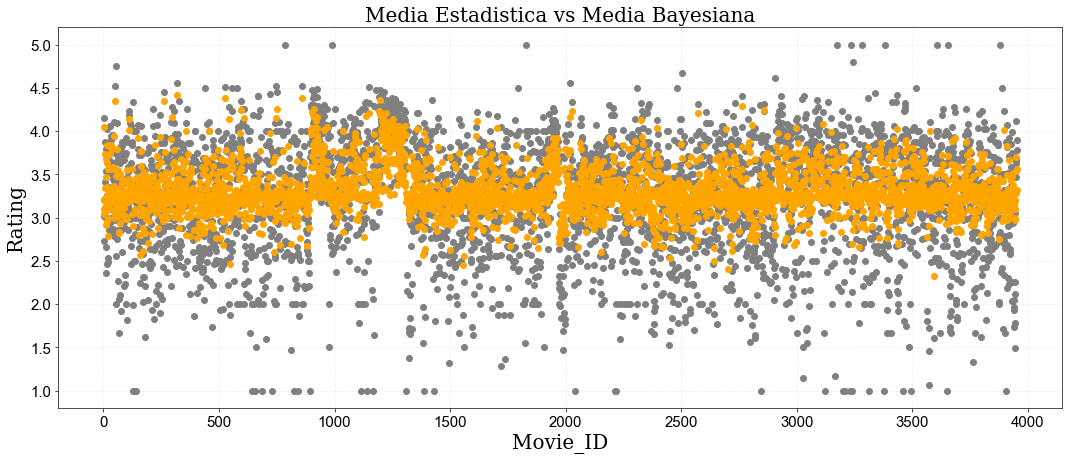

In [93]:
plt.figure(figsize=(18,7))
plt.plot(movie_sts["MovieID"],movie_sts["mean"],"o",label="Media estadistica",color="gray")

plt.plot(movie_sts["MovieID"],movie_sts["bayesian_average"],"o",label="Media bayesiana", color="orange")
plt.grid(visible = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.2)
plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15,color='black')

plt.xlabel("Movie_ID",fontLabel)
plt.ylabel('Rating',fontLabel)
plt.title("Media Estadistica vs Media Bayesiana",fontLabel)
plt.show()

<h3>Matriz de Usuario vs Peliculas</h3>


In [59]:
def create_sparse_matriz(dataframe):
    nUsr_unq = dataframe["UserID"].nunique()
    nMov_unq = dataframe["MovieID"].nunique()
    usr_map = dict(zip(np.unique(dataframe["UserID"]),list(range(nUsr_unq))))
    mov_map = dict(zip(np.unique(dataframe["MovieID"]),list(range(nMov_unq))))
    
    usr_inver_map = dict(zip(list(range(nUsr_unq)),np.unique(dataframe["UserID"])))
    mov_inver_map = dict(zip(list(range(nMov_unq)),np.unique(dataframe["MovieID"])))
    
    
    usr_indx = [usr_map[i] for i in dataframe["UserID"]]
    mov_indx = [mov_map[i] for i in dataframe["MovieID"]]
    sparse_mx = csr_matrix((dataframe["Ratings"],(mov_indx,usr_indx)),shape=(nMov_unq,nUsr_unq))
    
    return sparse_mx,usr_map,mov_map,usr_inver_map,mov_inver_map

In [60]:
sparse_mx,usr_map,mov_map,usr_inver_map,mov_inver_map = create_sparse_matriz(total_data)

In [61]:
sparse_mx.shape

(3706, 6040)

In [62]:
save_npz("Datasets/ml-1m/usr_mtx_sparce.npz",sparse_mx)

<h3>K-Nearest Neighbours</h3>
Minima distancia entre nodos

<p>Algoritmo supervisado y no parametrico,</p>

<h5>Metodos para medir distancias entre nodos mediante KNN</h5>
<ul>
    <li> Similitud del coseno</li>
    <li> Distancia Euclidiana</li>
    <li> Distancia de Manhattan </li>
    <li> Correlacion de Pearson</li>

</ul>

In [63]:
def knn_recomendation(movieID,sparse_mx,k,metric="cosine",show_distance=False):
    #k=Numero de recomendaciones
    
    neighboursID = []
    mov_ind = mov_map[movieID]
    mov_vector = sparse_mx[mov_ind]
    k = k + 1
    knn = NearestNeighbors(n_neighbors=k,algorithm="brute",metric=metric)
    knn.fit(sparse_mx)
    if isinstance(mov_vector,(np.ndarray)):
        mov_vector = mov_vector.reshape(1,-1)
    neighbour = knn.kneighbors(mov_vector,return_distance=show_distance)
    for i in range(0,k):
        n=neighbour.item(i)
        neighboursID.append(mov_inver_map[n])
    neighboursID.pop(0)
    return neighboursID

In [97]:
movies_titles = dict(zip(data_movie_copy["MovieID"],data_movie_copy["Title"]))

#Ingreso del ID de la pelicula para prediccion.
movie_id = 12
##############################################


movies_recomendation_final = knn_recomendation(movie_id,sparse_mx,k=10)
movieTitle = movies_titles[movie_id]
print(f" Pelicula vista originalmente :::::::::>>>>>> {movieTitle}")
print("***************************************************************************")
print("Peliculas Recomendadas")
print("***************************************************************************")

recomendation_data = []

for i in movies_recomendation_final:
    recomendation_data.append(movies_titles[i])
    print(movies_titles[i])

 Pelicula vista originalmente :::::::::>>>>>> Dracula: Dead and Loving It (1995)
***************************************************************************
Peliculas Recomendadas
***************************************************************************
Spy Hard (1996)
Bio-Dome (1996)
Mafia! (1998)
Gremlins 2: The New Batch (1990)
Down Periscope (1996)
Tales from the Crypt Presents: Bordello of Blood (1996)
Vampires (1998)
Robin Hood: Men in Tights (1993)
American Werewolf in Paris, An (1997)
Bats (1999)


In [98]:
#dic_data = {}
recomendation_data = []

#n = 0

for i in movies_recomendation_final:
    #string ="movie" + "_" + str(n)
    #dic_data[string] = movies_titles[i]
    recomendation_data.append(movies_titles[i])
    print(movies_titles[i])
    #n = n+1

Spy Hard (1996)
Bio-Dome (1996)
Mafia! (1998)
Gremlins 2: The New Batch (1990)
Down Periscope (1996)
Tales from the Crypt Presents: Bordello of Blood (1996)
Vampires (1998)
Robin Hood: Men in Tights (1993)
American Werewolf in Paris, An (1997)
Bats (1999)


In [66]:
#dic_data

---

<h1>Subir recomendaciones a Firebase</h1>

---

In [67]:
#recomendation_data

In [68]:
#dic_data["recomendations"] = recomendation_data

In [69]:
#dic_data

In [70]:
#dic_data.get

In [99]:
score_community = list(total_data["Ratings"])

---

In [100]:
from firebase import firebase
firebase = firebase.FirebaseApplication("https://movie-recomendation-a415c-default-rtdb.firebaseio.com/",None)

In [101]:
for i in range(len(recomendation_data)):
    dic_data={}
    string = "name_movie"
    string2= "score_recomendation"
    dic_data[string] = recomendation_data[i]
    dic_data[string2] = 0
    firebase.patch("/recomendations_movies_data/recomendation_"+str(i),dic_data)



In [74]:
#Solution for python :: pip install git+https://github.com/ozgur/python-firebase

In [75]:
len(movies_titles)
type(movies_titles)

dict

In [76]:
data_movie_copy.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


---

<h1>Execute ONCE</h1>

In [102]:
for i in tqdm(movies_titles):
    dic_data_2={}
    dic_data_2["name_movie"] = movies_titles[i]
    dic_data_2["identifier"] = i
    dic_data_2["flag"] = 0
    firebase.patch("/movie_title/movie_"+str(i),dic_data_2)

100%|██████████████████████████████████████████████████████████████████████████████| 3883/3883 [21:14<00:00,  3.05it/s]
